In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import uuid
import time
import torchvision

E:\EMOTION_DETECTION\project\efod\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path= 'emo_last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\JAY/.cache\torch\hub\master.zip
requirements: YOLOv5 requirement "scipy>=1.4.1" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\JAY\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2022-12-16 Python-3.10.5 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients
Adding AutoShape... 


In [4]:
img = os.path.join( 'data', 'images','happy.0e556b6c-7af0-11ed-b44c-c8ff28cfbf82.jpg')

In [5]:
img

'data\\images\\happy.0e556b6c-7af0-11ed-b44c-c8ff28cfbf82.jpg'

In [6]:
results = model(img)

In [7]:
results.print()

image 1/1: 480x640 1 happy
Speed: 858.5ms pre-process, 1029.6ms inference, 468.7ms NMS per image at shape (1, 3, 480, 640)


In [26]:
img1 = os.path.join( 'data', 'images','unhappy.3af9ce3f-7af0-11ed-a99b-c8ff28cfbf82.jpg')

In [27]:
results1 = model(img1)

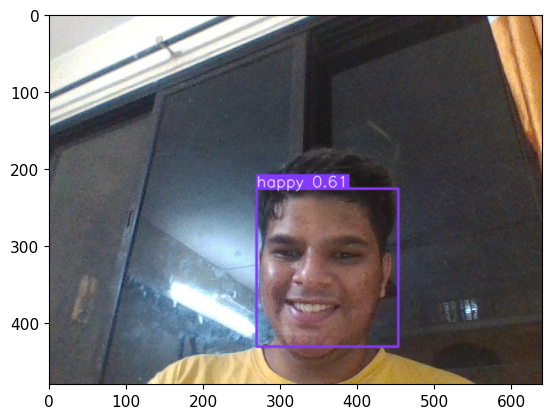

In [28]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

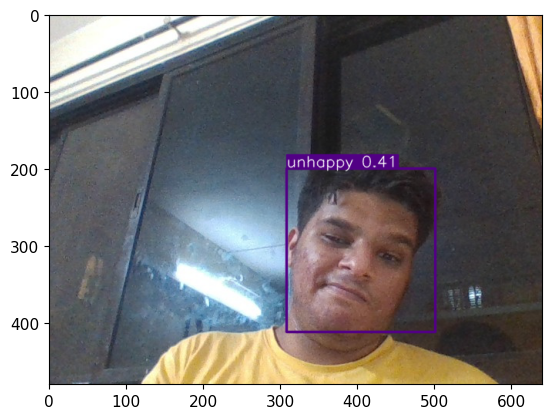

In [29]:
%matplotlib inline 
plt.imshow(np.squeeze(results1.render()))
plt.show()

In [3]:
cap = cv.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv.imshow('YOLO', np.squeeze(results.render()))
    
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [11]:
model(frame)

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x640 (no detections)
Speed: 8.0ms pre-process, 956.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)